In [ ]:
import os
os.chdir("/content/drive/MyDrive/sentiment analysis")

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
training_data = pd.read_csv("twitter_training.csv", header=None, names = ['ID', 'entity', 'sentiment', 'tweets'])
validation_data = pd.read_csv("twitter_validation.csv", header=None, names = ['ID', 'entity', 'sentiment', 'tweets'])

In [ ]:
training_data.head()

,ID,entity,sentiment,tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
validation_data.head()

,ID,entity,sentiment,tweets
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [ ]:
np.unique(training_data['entity'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [ ]:
np.unique(validation_data['entity'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [ ]:
df = pd.concat([training_data, validation_data], ignore_index=True)

In [ ]:
df_new = df.copy()

In [ ]:
df_new = df_new.drop('ID', axis =1)

In [ ]:
df_new.head()

,entity,sentiment,tweets
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df_new['sentiment'].value_counts()

,count
sentiment,
Negative,22808
Positive,21109
Neutral,18603
Irrelevant,13162


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

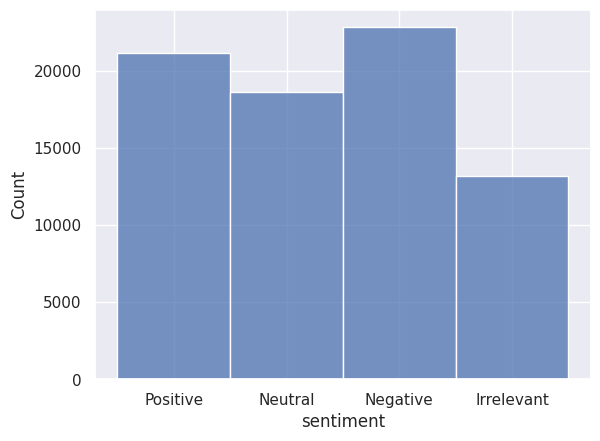

In [ ]:
sns.histplot(df_new['sentiment'])
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [ ]:
labelE = LabelEncoder()

In [ ]:
one = OneHotEncoder()

In [ ]:
df_new['sentiment'] = one.fit_transform(df_new[['sentiment']]).toarray()

In [ ]:
df_new['entity'] = labelE.fit_transform(df_new['entity'])

In [ ]:
df_new['entity']

,entity
0,4
1,4
2,4
3,4
4,4
...,...
75677,14
75678,5
75679,4
75680,19


In [ ]:
import re

In [ ]:
def remove_emojis(text):
    if not isinstance(text, str):
        text = str(text)

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F700-\U0001F77F"
        u"\U0001F780-\U0001F7FF"
        u"\U0001F800-\U0001F8FF"
        u"\U0001F900-\U0001F9FF"
        u"\U0001FA00-\U0001FA6F"
        u"\U0001FA70-\U0001FAFF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [ ]:
df_new['tweets'] = df_new['tweets'].apply(remove_emojis)

In [ ]:
df_new['tweets'] = df_new['tweets'].apply(lambda x: x.lower())

In [ ]:
df_new

,entity,sentiment,tweets
0,4,0.0,im getting on borderlands and i will murder yo...
1,4,0.0,i am coming to the borders and i will kill you...
2,4,0.0,im getting on borderlands and i will kill you ...
3,4,0.0,im coming on borderlands and i will murder you...
4,4,0.0,im getting on borderlands 2 and i will murder ...
...,...,...,...
75677,14,1.0,toronto is the arts and culture capital of ca...
75678,5,1.0,this is actually a good move tot bring more vi...
75679,4,0.0,today sucked so it’s time to drink wine n play...
75680,19,0.0,bought a fraction of microsoft today. small wins.


In [ ]:
!pip install tensorflow

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense, GRU

In [ ]:
tf_vec = TfidfVectorizer(max_features = 1000)

In [ ]:
tweets = tf_vec.fit_transform(df_new['tweets']).toarray()

In [ ]:
labels = df_new['sentiment'].values

In [ ]:
entity = df_new['entity'].values

In [ ]:
X = np.hstack((tweets, entity.reshape(-1,1)))

In [ ]:
X = np.expand_dims(X, axis=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    labels,
    test_size = 0.2,
    random_state = 2000,
    stratify = labels
)

In [ ]:
X_train.shape

(60545, 1001, 1)

In [ ]:
X_test.shape

(15137, 1001, 1)

In [ ]:
y_train.shape

(60545,)

In [ ]:
y_test.shape

(15137,)

In [ ]:
model = Sequential([
    GRU(128, input_shape = (X_train.shape[1],1)),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(4, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

model.compile(optimizer = 'adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)

In [ ]:
history = model.fit(X_train, y_train, epochs = 3, batch_size = 64, validation_data = (X_test, y_test), callbacks= [callback])

Epoch 1/3
947/947 ━━━━━━━━━━━━━━━━━━━━ 1018s 1s/step - accuracy: 0.8037 - loss: 0.5260 - val_accuracy: 0.8261 - val_loss: 0.4551
Epoch 2/3
947/947 ━━━━━━━━━━━━━━━━━━━━ 1024s 1s/step - accuracy: 0.8270 - loss: 0.4552 - val_accuracy: 0.8261 - val_loss: 0.4529
Epoch 3/3
947/947 ━━━━━━━━━━━━━━━━━━━━ 1012s 1s/step - accuracy: 0.8288 - loss: 0.4517 - val_accuracy: 0.8261 - val_loss: 0.4513


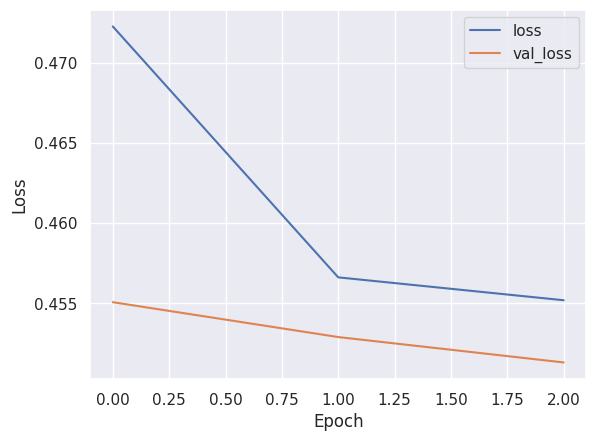

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()